In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import time
import gzip
import shutil, os, sys
from os.path import dirname
import json

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


In [2]:
current_dir = (os.getcwd())
parent_dir = (dirname(os.getcwd()))

sys.path.append(parent_dir )

if 'plot_functions' in sys.modules: 
    del sys.modules['plot_functions']

from plot_functions import *



In [4]:
core_file = '/'.join([current_dir,  'sim.pklz' ]) 
f = gzip.open(core_file,'rb')
sim = pickle.load(f) 
f.close()  

sim = pd.Series(sim)


Text(0.5,1,'Hydrograph')

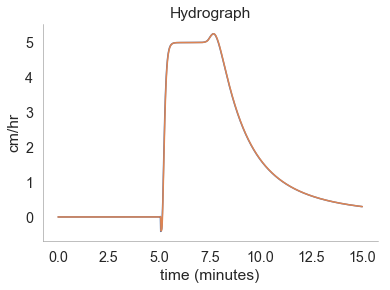

In [8]:
plt.plot(sim['t_h']/60., sim['hydro']*3.6e3)
plt.plot(sim['t_p']/60., sim['flux1']*3.6e3)

plt.xlabel('time (minutes)')
plt.ylabel('cm/hr')
plt.title('Hydrograph')


Text(0.5,0,'x')

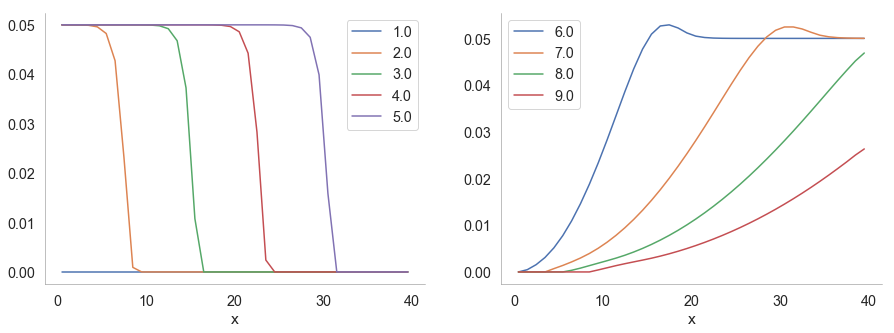

In [36]:
fig = plt.figure(figsize= (15,5))
plt.subplots_adjust(wspace = 0.2)

sim['qc'] = sim['hc']*sim['vc']*3600/sim.Ly  # 
ax1 = plt.subplot(121)
for i, t in enumerate(sim.t_p[1:6]):
    plt.plot(sim.d2divide.mean(0), -sim['qc'].mean(1)[i], label = t/60.)
plt.legend()
plt.xlabel('x')

ax1 = plt.subplot(122)
for i, t in enumerate(sim.t_p[6:10]):
    plt.plot(sim.d2divide.mean(0), -sim['qc'].mean(1)[i+6], label = t/60.)
plt.legend()
plt.xlabel('x')
 
 

/Users/octavia/anaconda3/envs/ipy2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/octavia/anaconda3/envs/ipy2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/octavia/anaconda3/envs/ipy2

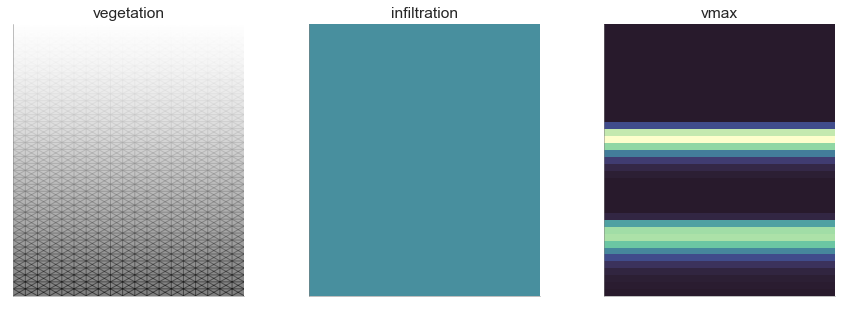

In [39]:
fig = plt.figure(figsize= (15,5))
plt.subplots_adjust(wspace = 0.2)


ax1 = plt.subplot(131)
color_topo(sim.zc, ax = ax1, dx = sim.dx)
veg_points(sim.isvegc, dx  = sim.dx, ax = ax1)
ax1.set_title('vegetation')
# plot_c(sim.isvegc, dx = sim.dx, ax = ax1)

ax1 = plt.subplot(132)
zinflplot = colormap(sim,sim['zinflc'], ax = ax1, clabel= '$I$ (cm)', colorbar = True )
ax1.set_title('infiltration')
# plot_c(sim.isvegc, dx = sim.dx, ax = ax1)

ax1 = plt.subplot(133)
zinflplot = colormap(sim,-sim['vmax'], ax = ax1, clabel= 'velocity (cm/s)' ,
                     veg_scale=False)
ax1.set_title('vmax')

for i, label in enumerate(('veg', 'infl', 'max velocity')):
    ax = plt.subplot(1,3,i+1)
    


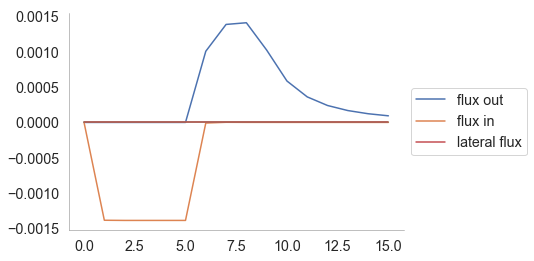

In [40]:
plt.plot(sim.flux1, label = 'flux out')
plt.plot(sim.flux3, label = 'flux in')
plt.plot(sim.flux4)
plt.plot(sim.flux2, label = 'lateral flux')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

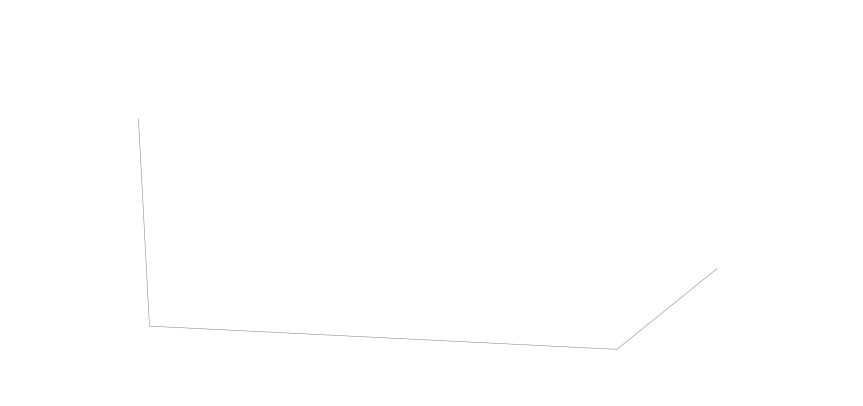

In [11]:
### Here is a 3D plot, for illustration only

fig = plt.figure( figsize = (15, 7))
ax = fig.add_subplot(111, projection='3d')

# Get rid of colored axes planes
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.set_xticks([], []);
ax.set_zticks([], []);
ax.set_yticks([], []);
# plt.axis('off')
ax.grid(False)

#Plot the surface with face colors taken from the array we made.
norm = plt.Normalize()
colors = cm.Greens(norm(sim.isvegc ))
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

im = ax.scatter(sim.xc[ sim.isvegc == 1], sim.yc[ sim.isvegc == 1] ,sim.yc[ sim.isvegc == 1],
                 c = 'g',  marker='o',  s = 20, alpha =1 )
 
ax.view_init(20, 195)


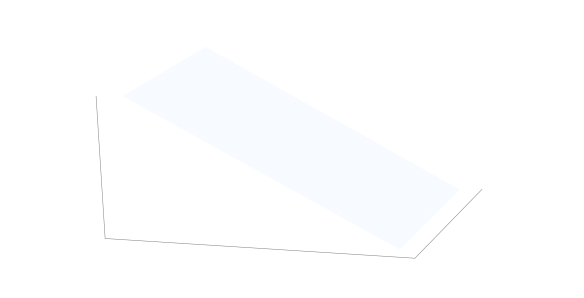

In [12]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure( figsize = (10, 5))
ax = fig.add_subplot(111, projection='3d')
# Get rid of colored axes planes
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.set_xticks([], []);
ax.set_zticks([], []);
ax.set_yticks([], []);

ax.grid(False)


# # Plot the surface with face colors taken from the array we made.
norm = plt.Normalize()
colors = cm.Blues(norm(sim.zinflc ))
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

im = ax.plot_surface(sim.xc, sim.yc+1 ,sim.yc, facecolors = colors , rstride = 1, cstride = 1,
                       linewidth=0,antialiased=True, shade=False)

ax.view_init(25, 195)
